In [1]:
from src.solving_eos import EOS

In [2]:
molecule = EOS(molecule='NH3')
print("ω = ", molecule.ω)
print("Pc = ", molecule.Pc)
print("Tc = ", molecule.Tc)
print("Or = ", molecule.Or)
print("Ov = ", molecule.Ov)
print(molecule.antoineq)

ω =  0.255
Pc =  11277000.0
Tc =  405.55
Or =  [13.6  13.6   8.92]
Ov =  [4800. 1360. 4880. 4880. 2330. 2330.]
             T1     T2       A         B       C
molecule                                        
NH3       164.0  239.6  3.1876   506.713 -80.780
NH3       239.6  371.5  4.8689  1113.928 -10.409


In [26]:
T1 = [200, 200]
P1 = [6000, 9000]
molecule.solve_eos(T1, P1)

array([2.76756494e-01, 2.66610999e-05])

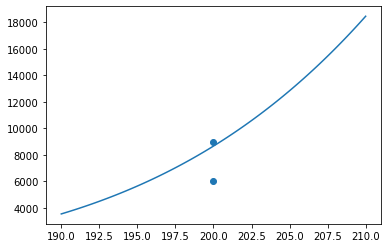

In [27]:
import numpy as np
import matplotlib.pyplot as plt
T = np.linspace(190, 210, 100)
plt.plot(T, molecule.antoine(T))
plt.scatter(T1, P1)

In [20]:
molecule.solve_eos([200], [7000])

array([0.23716375])

In [102]:
#Deliverables in Summary Format:
T1 = 200     #Kelvin
P1 = 9000    #Pascals

T2 = 450     #Kelvin
P2 = 209000  #Pascals

H1_Ideal = molecule.H_ig(T1, P1)
S1_Ideal = molecule.S_ig(T1, P1)
G1_Ideal = H1_Ideal-T1*S1_Ideal

H2_Ideal = molecule.H_ig(T2, P2)
S2_Ideal = molecule.S_ig(T2, P2)
G2_Ideal = H2_Ideal-T2*S2_Ideal

H1_Depart = molecule.ΔH_dep(T1, P1)
S1_Depart = molecule.ΔS_dep(T1, P1)
G1_Depart = H1_Depart-T1*S1_Depart
G1_Depart_Check = molecule.ΔG_dep(T1, P1)

#T>371.5 creates error in Antoine routine: "single positional indexer is out-of-bounds"
T2=371.4

H2_Depart = molecule.ΔH_dep(T2, P2)
S2_Depart = molecule.ΔS_dep(T2, P2)
G2_Depart = H2_Depart-T2*S2_Depart
G2_Depart_Check = molecule.ΔG_dep(T2, P2)

print('H1_Ideal =',np.round(H1_Ideal/1000,2),'kJ/mol    ','S1_Ideal =  ', np.round(S1_Ideal,3),'J/mol/K    ','G1_Ideal =',np.round(G1_Ideal/1000,2),'kJ/mol')
print('H2_Ideal =',np.round(H2_Ideal/1000,2),'kJ/mol    ','S2_Ideal =  ', np.round(S2_Ideal,3),' J/mol/K    ','G2_Ideal =',np.round(G2_Ideal/1000,2),'kJ/mol')
print('')
print('H1_Depart =   ',np.round(H1_Depart/1000,2),'kJ/mol    ','S1_Depart =', np.round(S1_Depart,3),'J/mol/K    ','G1_Depart =  ',np.round(G1_Depart/1000,2),'kJ/mol')

#T>371.5 creates error in Antoine routine: "single positional indexer is out-of-bounds"
T2=371.4
print('H2_Depart = ',np.round(H2_Depart/1000,2),'kJ/mol    ','S2_Depart =  ', np.round(S2_Depart,3),'J/mol/K    ','G2_Depart = ',np.round(G2_Depart/1000,2),'kJ/mol')
print('')

print('ΔH1_to_2_Ideal =  ',np.round((H2_Ideal-H1_Ideal)/1000,2),'kJ/mol    ','    ΔH1_to_2_Real = ',np.round((H2_Ideal+H2_Depart-H1_Ideal-H1_Depart)/1000,2),'kJ/mol    ',)
print('ΔS1_to_2_Ideal =  ',np.round((S2_Ideal-S1_Ideal),1),'J/mol/K    ','   ΔS1_to_2_Real = ',np.round((S2_Ideal+S2_Depart-S1_Ideal-S1_Depart),1),'J/mol/K    ',)
print('ΔG1_to_2_Ideal =',np.round((G2_Ideal-G1_Ideal)/1000,2),'kJ/mol    ','   ΔG1_to_2_Real = ',np.round((G2_Ideal+G2_Depart-G1_Ideal-G1_Depart)/1000,2),'kJ/mol    ',)


H1_Ideal = -1151.47 kJ/mol     S1_Ideal =   199.385 J/mol/K     G1_Ideal = -1191.34 kJ/mol
H2_Ideal = -1142.36 kJ/mol     S2_Ideal =   202.42  J/mol/K     G2_Ideal = -1233.45 kJ/mol

H1_Depart =    7.06 kJ/mol     S1_Depart = -126.385 J/mol/K     G1_Depart =   32.34 kJ/mol
H2_Depart =  205.86 kJ/mol     S2_Depart =   -0.153 J/mol/K     G2_Depart =  205.91 kJ/mol

ΔH1_to_2_Ideal =   9.1 kJ/mol         ΔH1_to_2_Real =  207.9 kJ/mol    
ΔS1_to_2_Ideal =   3.0 J/mol/K        ΔS1_to_2_Real =  129.3 J/mol/K    
ΔG1_to_2_Ideal = -42.11 kJ/mol        ΔG1_to_2_Real =  131.47 kJ/mol    
